# Final Project - MRI and Alzheimers
source: https://www.kaggle.com/jboysen/mri-and-alzheimers

Acknowledgments: "Data were provided [in part] by OASIS [insert appropriate OASIS source info]” 
OASIS-3: Principal Investigators: T. Benzinger, D. Marcus, J. Morris; NIH P50AG00561, P30NS09857781, P01AG026276, P01AG003991, R01AG043434, UL1TR000448, R01EB009352. AV-45 doses were provided by Avid Radiopharmaceuticals, a wholly owned subsidiary of Eli Lilly.
OASIS: Cross-Sectional: Principal Investigators: D. Marcus, R, Buckner, J, Csernansky J. Morris; P50 AG05681, P01 AG03991, P01 AG026276, R01 AG021910, P20 MH071616, U24 RR021382
OASIS: Longitudinal: Principal Investigators: D. Marcus, R, Buckner, J. Csernansky, J. Morris; P50 AG05681, P01 AG03991, P01 AG026276, R01 AG021910, P20 MH071616, U24 RR021382 



Acknowledgements:
When publishing findings that benefit from OASIS data, please include the following grant numbers in the acknowledgements section and in the associated Pubmed Central submission: P50 AG05681, P01 AG03991, R01 AG021910, P20 MH071616, U24 RR0213
Inspiration:
Can you predict dementia? Alzheimer’s?

In [1]:
import pandas as pd
import numpy as np

In [38]:
import seaborn as sns

In [2]:
cross_raw = pd.read_csv('oasis_cross-sectional.csv')

In [3]:
# Additionally, a reliability data set is included containing 20 nondemented subjects imaged on a 
# subsequent visit within 90 days of their initial session.
reliability = cross_raw.iloc[-20:, :]

**Cross-sectional MRI Data in Young, Middle Aged, Nondemented and Demented Older Adults:**

This set consists of a cross-sectional collection of 416 subjects aged 18 to 96. For each subject, 3 or 4 individual T1-weighted MRI scans obtained in single scan sessions are included. The subjects are all right-handed and include both men and women. 100 of the included subjects over the age of 60 have been clinically diagnosed with very mild to moderate Alzheimer’s disease (AD).

In [3]:
cross = cross_raw.iloc[:-20, :]

** Columns:**

ID Identification

M/F Gender

HandDominant Hand

Age Age in years

Educ Education Level Education codes correspond to the following levels of education: 1: less than high school grad., 2: high school grad., 3: some college, 4: college grad., 5: beyond college.

SES Socioeconomic Status

MMSE Mini Mental State Examination

CDR Clinical Dementia Rating  (CDR; 0= nondemented; 0.5 – very mild dementia; 1 = mild dementia; 2 = moderate dementia) (Morris, 1993). All participants with dementia (CDR >0) were diagnosed with probable AD.

eTIV Estimated Total Intracranial Volume

nWBV Normalize Whole Brain Volume

ASF Atlas Scaling Factor

Delay

In [4]:
cross.drop(['ID','Hand','Delay'], axis=1,  inplace=True)

cross['Gender'] = pd.get_dummies(cross['M/F'], drop_first=True)

cross.drop('M/F', axis=1,  inplace=True)

C:\Users\Jimena\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Jimena\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Jimena\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/in

In [13]:
cross.head()

,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Gender
0,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,0
1,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,0
2,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,0
3,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,1
4,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,1


In [65]:
#split data
from sklearn.model_selection import train_test_split
cross_train, cross_test = train_test_split(cross)
cross_train.head()

,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Gender
329,74,5.0,2.0,30.0,0.0,1806,0.754,0.972,1
155,41,NaN,NaN,NaN,NaN,1361,0.849,1.289,0
126,24,NaN,NaN,NaN,NaN,1178,0.873,1.489,0
365,19,NaN,NaN,NaN,NaN,1592,0.833,1.102,1
405,92,4.0,1.0,24.0,0.5,1388,0.739,1.264,0


In [22]:
cross_train.describe()

,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Gender
count,312.000000,178.000000,164.000000,178.000000,178.000000,312.000000,312.000000,312.000000,312.000000
mean,53.051282,3.241573,2.475610,27.224719,0.272472,1479.919872,0.789484,1.201128,0.381410
std,24.998082,1.333218,1.132082,3.535942,0.368499,159.941076,0.059722,0.129921,0.486513
min,18.000000,1.000000,1.000000,14.000000,0.000000,1123.000000,0.644000,0.881000,0.000000
25%,24.000000,2.000000,2.000000,26.000000,0.000000,1362.000000,0.741500,1.112750,0.000000
50%,57.500000,3.000000,2.000000,29.000000,0.000000,1478.000000,0.804500,1.188000,0.000000
75%,75.000000,4.750000,4.000000,30.000000,0.500000,1578.000000,0.841000,1.289250,1.000000
max,96.000000,5.000000,5.000000,30.000000,2.000000,1992.000000,0.893000,1.563000,1.000000


In [59]:
cross_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 312 entries, 277 to 195
Data columns (total 9 columns):
Age       312 non-null int64
Educ      174 non-null float64
SES       163 non-null float64
MMSE      174 non-null float64
CDR       174 non-null float64
eTIV      312 non-null int64
nWBV      312 non-null float64
ASF       312 non-null float64
Gender    312 non-null uint8
dtypes: float64(6), int64(2), uint8(1)
memory usage: 22.2 KB


In [21]:
groupby_gender = cross_train.groupby('Gender')
groupby_gender.mean()

,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
Gender,,,,,,,,
0,56.025907,3.221311,2.50,27.393443,0.229508,1408.984456,0.787819,1.258503
1,48.226891,3.285714,2.42,26.857143,0.366071,1594.966387,0.792185,1.108076


In [7]:
# only MRI data
MRI_data = cross_train[['Age', 'eTIV', 'nWBV', 'ASF', 'Gender']]

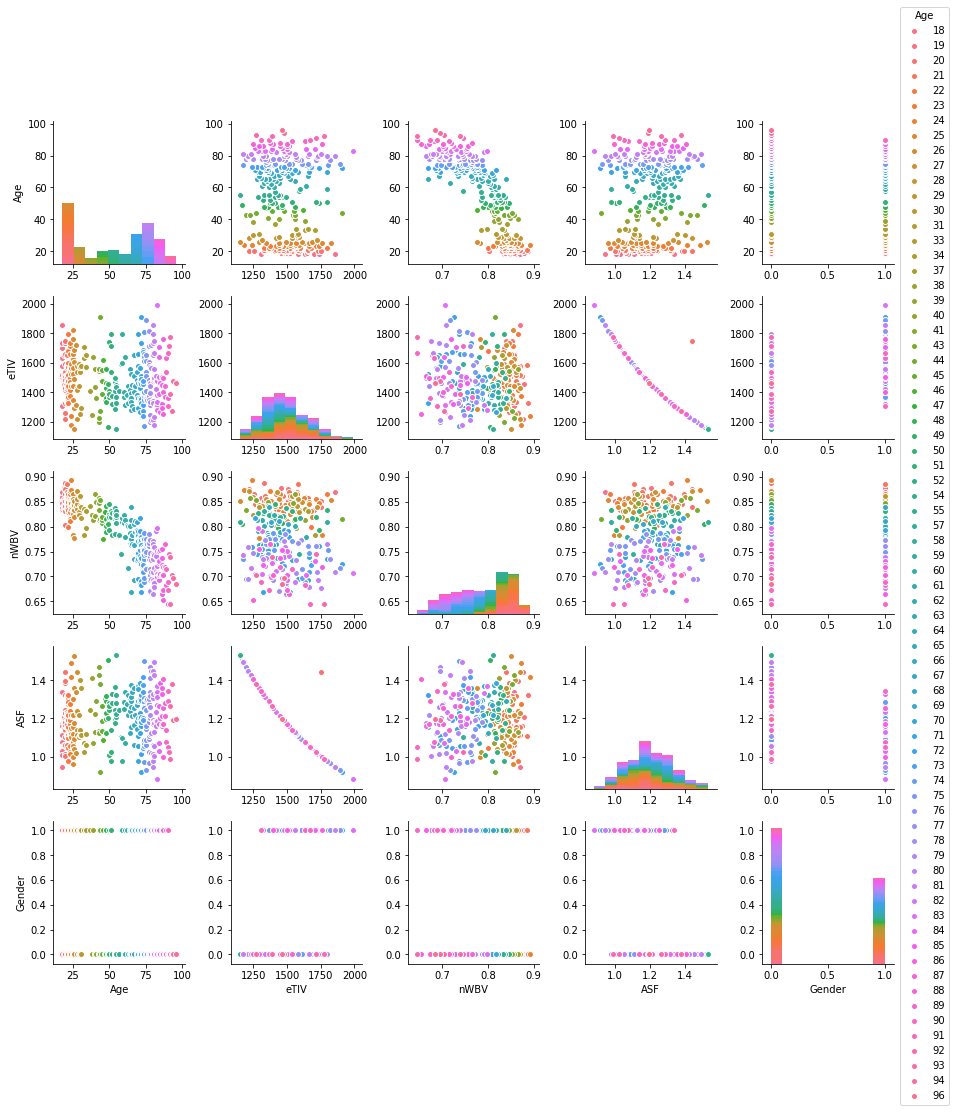

In [49]:
%matplotlib inline
sns_plot = sns.pairplot(MRI_data, hue="Age")
sns_plot.savefig("pairplot_MRI_Age.png")

In [66]:
#CDR Clinical Dementia Rating (CDR; 0= nondemented; 0.5 – very mild dementia; 1 = mild dementia; 2 = moderate dementia) (Morris, 1993). 
#All participants with dementia (CDR >0) were diagnosed with probable AD.
cross_train['AD'] = np.where([cross_train.CDR > 0],1,0)[0]


cross_train.drop('CDR', axis=1,  inplace=True)

#Have dropped Atlas Scaling Factor since ASF and eTIV are linear dependent so it would result in multicollinearity.
cross_train.drop('ASF', axis=1,  inplace=True)

cross_train.drop('SES', axis=1,  inplace=True)

C:\Users\Jimena\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Jimena\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Jimena\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __na

In [67]:
# I only use real data so drop all NA rows
AD_data = cross_train.dropna(axis=0, how='any', inplace=False)

In [68]:
AD_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176 entries, 329 to 318
Data columns (total 7 columns):
Age       176 non-null int64
Educ      176 non-null float64
MMSE      176 non-null float64
eTIV      176 non-null int64
nWBV      176 non-null float64
Gender    176 non-null uint8
AD        176 non-null int32
dtypes: float64(3), int32(1), int64(2), uint8(1)
memory usage: 9.1 KB


## Discriminative Models
Naïve Bayesian Classifiers



In [69]:
# Find correlations and sort
AD_data.corr()["AD"].sort_values()

MMSE     -0.623145
nWBV     -0.430835
Educ     -0.222956
eTIV      0.111049
Gender    0.143736
Age       0.281205
AD        1.000000
Name: AD, dtype: float64

In [70]:
#Import Library of Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#assigning predictor and target variables
Y_train = AD_data.AD.values

X_train = AD_data[['Age', 'Educ', 'MMSE', 'eTIV', 'nWBV', 'Gender']].values

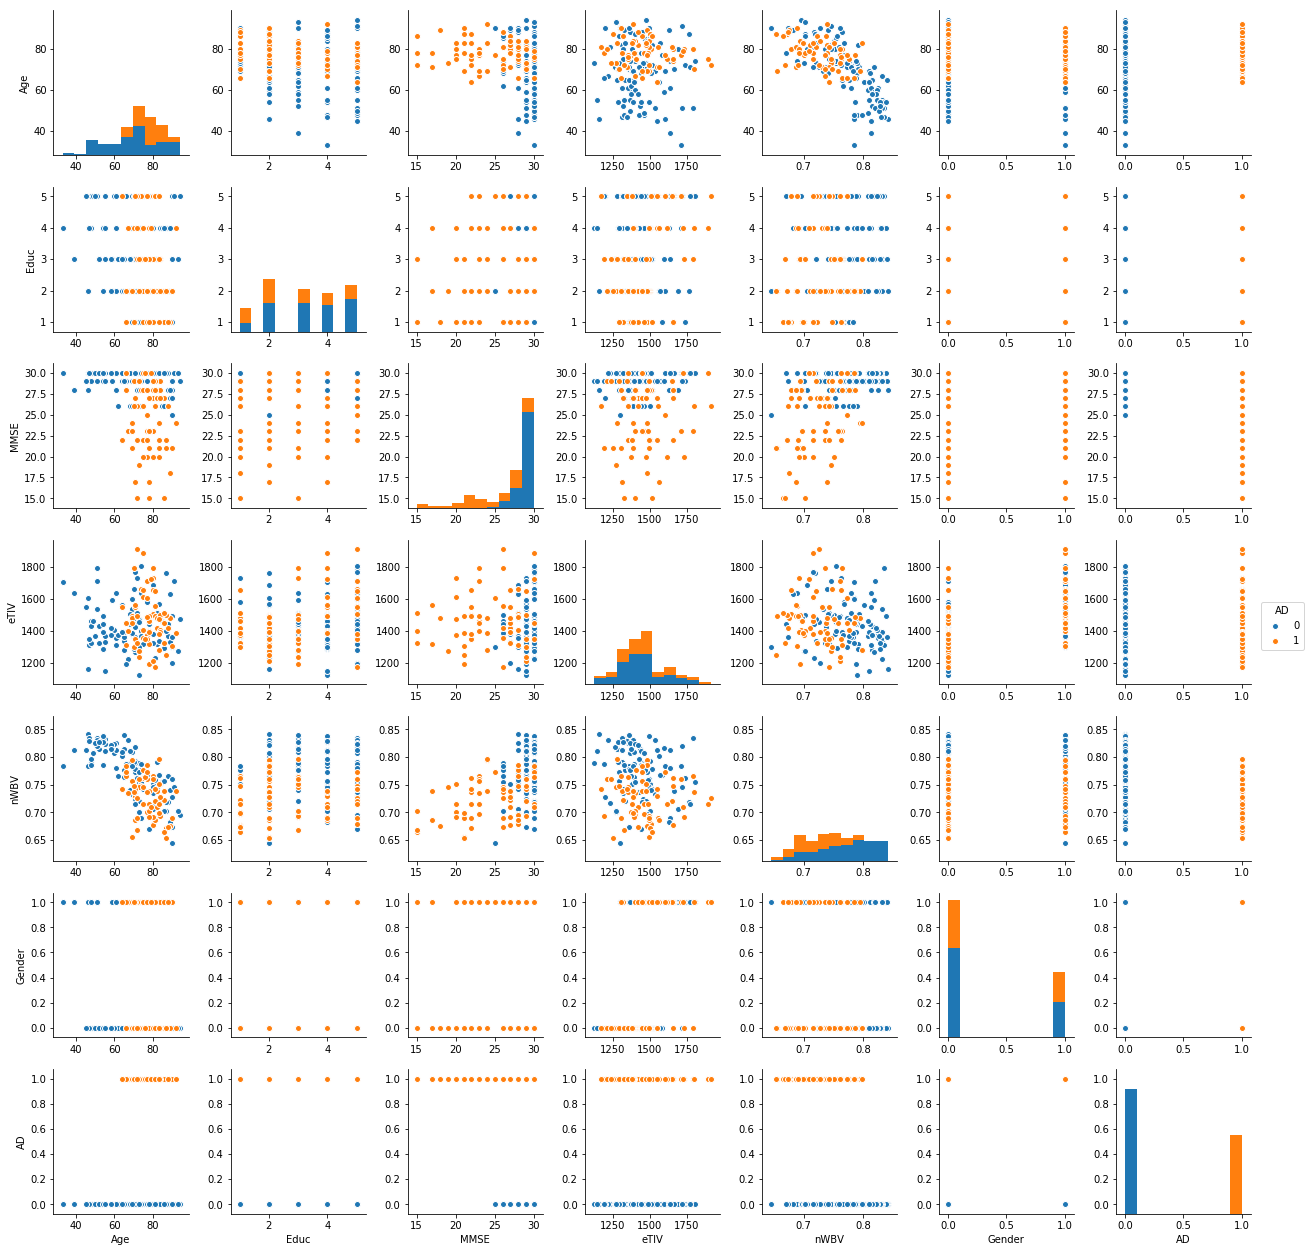

In [47]:
%matplotlib inline
sub_set = AD_data[['Age', 'Educ', 'MMSE', 'eTIV', 'nWBV', 'Gender', 'AD']]
sns.pairplot(sub_set, hue='AD')

### Checking distribution features

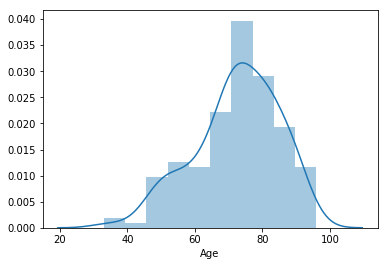

In [86]:
sns.distplot( AD_data['Age'], bins=10);

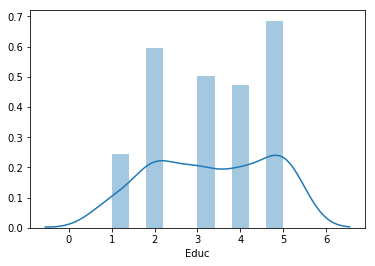

In [87]:
sns.distplot( AD_data['Educ'], bins=10);

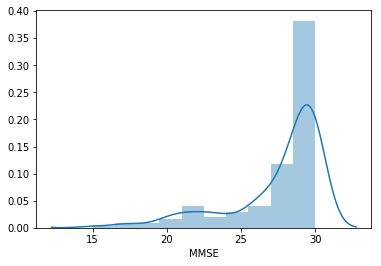

In [89]:
sns.distplot( AD_data['MMSE'], bins=10);

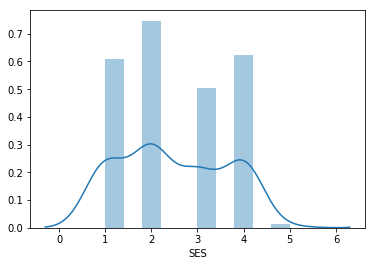

In [90]:
sns.distplot( AD_data['SES'], bins=10);

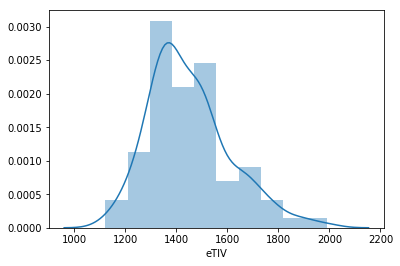

In [91]:
sns.distplot( AD_data['eTIV'], bins=10);

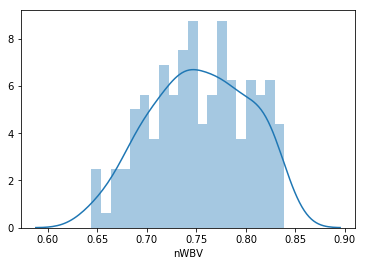

In [93]:
sns.distplot( AD_data['nWBV'], bins=20);

Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of independence between every pair of features. 

In [71]:
#data standardization
from sklearn import preprocessing
X_scaled = preprocessing.scale(X_train)

In [72]:
#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets 
model.fit(X_scaled, Y_train)

GaussianNB(priors=None)

In [73]:
cross_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104 entries, 170 to 251
Data columns (total 9 columns):
Age       104 non-null int64
Educ      59 non-null float64
SES       56 non-null float64
MMSE      59 non-null float64
CDR       59 non-null float64
eTIV      104 non-null int64
nWBV      104 non-null float64
ASF       104 non-null float64
Gender    104 non-null uint8
dtypes: float64(6), int64(2), uint8(1)
memory usage: 7.4 KB


In [74]:
#CDR Clinical Dementia Rating (CDR; 0= nondemented; 0.5 – very mild dementia; 1 = mild dementia; 2 = moderate dementia) (Morris, 1993). 
#All participants with dementia (CDR >0) were diagnosed with probable AD.
cross_test['AD'] = np.where([cross_test.CDR > 0],1,0)[0]


cross_test.drop('CDR', axis=1,  inplace=True)

#Have dropped Atlas Scaling Factor since ASF and eTIV are linear dependent so it would result in multicollinearity.
cross_test.drop('ASF', axis=1,  inplace=True)

cross_test.drop('SES', axis=1,  inplace=True)

C:\Users\Jimena\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Jimena\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Jimena\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __na

In [75]:
# I only use real data so drop all NA rows
AD_test = cross_test.dropna(axis=0, how='any', inplace=False)

In [76]:
AD_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 170 to 251
Data columns (total 7 columns):
Age       59 non-null int64
Educ      59 non-null float64
MMSE      59 non-null float64
eTIV      59 non-null int64
nWBV      59 non-null float64
Gender    59 non-null uint8
AD        59 non-null int32
dtypes: float64(3), int32(1), int64(2), uint8(1)
memory usage: 3.1 KB


In [77]:
Y_test = AD_test.AD.values
X_test = AD_test[['Age', 'Educ', 'MMSE', 'eTIV', 'nWBV', 'Gender']].values
X_test_scaled = preprocessing.scale(X_test)

### Classification metrics
Classification problems are perhaps the most common type of machine learning problem and as such there are a myriad of metrics that can be used to evaluate predictions for these problems.
In this section we will review how to use the following metrics:

1. Classification Accuracy.
2. Logarithmic Loss.
3. Area Under ROC Curve.
4. Confusion Matrix.
5. Classification Report.

source 
https://machinelearningmastery.com/metrics-evaluate-machine-learning-algorithms-python/

### 1. Classification Accuracy
Classification accuracy is the number of correct predictions made as a ratio of all predictions made.
This is the most common evaluation metric for classification problems and is really only suitable when there are an equal number of observations in each class.

In [78]:
# How many AD positive observations are in the test dataset?
print(len(Y_test))
print(Y_test.sum())

59
19


In [79]:
from sklearn import model_selection
scoring = 'accuracy'
results = model_selection.cross_val_score(model, X_test_scaled, Y_test, scoring=scoring)
print(("Accuracy: %.3f (%.3f)") % (results.mean(), results.std()))


Accuracy: 0.845 (0.047)


### 2. Logarithmic Loss
Logarithmic loss (or logloss) is a performance metric for evaluating the predictions of probabilities of membership to a given class.
The scalar probability between 0 and 1 can be seen as a measure of confidence for a prediction by an algorithm. Predictions that are correct or incorrect are rewarded or punished proportionally to the confidence of the prediction.

In [80]:
from sklearn import model_selection
scoring = 'neg_log_loss'
results = model_selection.cross_val_score(model, X_test_scaled, Y_test, scoring=scoring)
print(("Logloss: %.3f (%.3f)") % (results.mean(), results.std()))

Logloss: -0.557 (0.296)


### 3. Area Under ROC Curve

Area under ROC Curve (or AUC for short) is a performance metric for binary classification problems.
The AUC represents a model’s ability to discriminate between positive and negative classes. An area of 1.0 represents a model that made all predictions perfectly. An area of 0.5 represents a model as good as random. 
ROC can be broken down into sensitivity and specificity. A binary classification problem is really a trade-off between sensitivity and specificity.
Sensitivity is the true positive rate also called the recall. It is the number instances from the positive (first) class that actually predicted correctly.
Specificity is also called the true negative rate. Is the number of instances from the negative class (second) class that were actually predicted correctly.

In [81]:
scoring = 'roc_auc'
results = model_selection.cross_val_score(model, X_test_scaled, Y_test, scoring=scoring)
print(("AUC: %.3f (%.3f)") % (results.mean(), results.std()))

AUC: 0.881 (0.078)


### 4. Confusion Matrix

The confusion matrix is a handy presentation of the accuracy of a model with two or more classes.
The table presents predictions on the x-axis and accuracy outcomes on the y-axis. The cells of the table are the number of predictions made by a machine learning algorithm.
For example, a machine learning algorithm can predict 0 or 1 and each prediction may actually have been a 0 or 1. Predictions for 0 that were actually 0 appear in the cell for prediction=0 and actual=0, whereas predictions for 0 that were actually 1 appear in the cell for prediction = 0 and actual=1. And so on.

In [82]:
from sklearn.metrics import confusion_matrix
predicted = model.predict(X_test_scaled)
matrix = confusion_matrix(Y_test, predicted)
print(matrix)

[[35  5]
 [ 2 17]]


In [83]:
predicted.sum()

22

### 5. Classification Report

Scikit-learn does provide a convenience report when working on classification problems to give you a quick idea of the accuracy of a model using a number of measures.
The classification_report() function displays the precision, recall, f1-score and support for each class.

In [84]:
from sklearn.metrics import classification_report
report = classification_report(Y_test, predicted)
print(report)

             precision    recall  f1-score   support

          0       0.95      0.88      0.91        40
          1       0.77      0.89      0.83        19

avg / total       0.89      0.88      0.88        59

